# The sentiment differences between the writing styles of Jane Austen and Charles Dickens - Part 2

# 1. Introduction, objectives and background

## 1.1 Introduction

In coursework 1, we explored the overall sentiment in the random shuffle literature works dataset of Jane Austen and of Charles Dickens. We concluded that the literature works of Jane Austen have a higher overall score in positive sentiment, the literature works of Charles Dickens have a higher fluctuation in negative sentiment, and the literature works of Charles Dickens are higher in neutral sentiment.

In DSM020, we are going to use the same pre-processed datasets of both two authors to further explore the different segments, including Syntactic Analysis, Part-of-Speech, and Sentiment Analysis with two more indexes - compound sentiment and subjective. Furthermore, we are going to explore the technique of Term Frequency - Inverse Document Frequency (TF-IDF), Named Entity Recognition (NER), and Sentiment Analysis by Characters.

## 1.2 Objective
◆ Discover the syntactic usage tendency of the two authors.

◆ Investigate the usage amount in adjectives, adverbs, and verbs of two authors.

◆ The sentiment beyond positive, negative and neutral - compound sentiment in sentences.

◆ The polarity and sujectivity of the two authors.

◆ Preliminary examination about TF-IDF.

◆ Apply NER to the sentiment score of all characters in both authors' works.

## 1.3 Methodology (for DSM020)

### Dataset
Because of the limitation of the submission zip file size of coursework 1, the dataset of the paragraph collection of Jane Austen and of Charles Dickens has been randomly decreased to 2,000 lines in coursework 1. The way we chose randomly decreased lines is due to the dataset being a collection of paragraphs of their works and we aim to analyze the sentiment orientation in writing instead of in a certain piece of work. Therefore, we are going to use the same dataset to avoid inconsistency and ambiguity in the analysis results in DSM002.

### Workflow
Since we have an overview of their sentiment orientation, we want to further examine from different angles of the sentiment in their works. Firstly, we use the dataset from our coursework 1 to look into the sentence structure. Second, we take a deep look at the part of speech among adjectives, adverbs, and verbs. Afterwards, we mainly inspect the compound sentiments in the senteces. Additionally, we take a short view on the overall polarity and subjectively of their works. Next, we take three simple expiriments coding toward to TF-IDF, and NER to apply on the datasets.

### Technical improvements since CW 1
Overall, in coursework 1, we simply use VADER and wordcloud to process sentiment analysis in coursework 1, but there should be more applications in NLP for sentiment analysis for our exploration. The specificity of human language is that it is structured somehow but not 100%, so it can be applied to different situations in different ways by different people. Therefore, we decided to start from a linguistics perspective to examine the sentiment in their works. For sentence structure analysis, we use SpaCy and further visualize in a dependency tree, which is a new attempt for us. Moreover, we further examine the POS in word cloud, Polarity and Subjective for two authors, sentiment analysis in compound sentiment, simply review the TF-IDF technique, and NER for characters' sentiment analysis. Those approaches are for better preparation for our NLP module in Term 2.

Furthermore, we use "os.path.dirname(os.path.abspath('file'))" to make sure that our codes can successfully be executed on different computers, but we change to Google Colab for simply mount Google Drive as a new attempt. For stop words, we removed stop words at the very beginning in coursework 1, but the reason we did not proceed with the same step is that we thought that the stop words in literature work possibly affect the sentiment of a sentence and we aim to examine the syntactic and POS, and we also want to check if the removal of stop words would affect the sentiment analysis in literature works. Hence, we choose to remove stop words before we design the codes of TF-IDF and NER. Subsequently, in order to complete sentiment analysis by authors of their subjective, we try Textblob, which is also a tool for sentiment analysis, instead of VADER. Moreover, during remove stop word, we also introduce "Stemmer" to prepare for TF-IDF and NER. Lastly, we try to move all libraries and modules to the beginning of the program to improve the readability of the program.

### Ethics
Moreover, to better complete the rubric from coursework 1 "Ethics of use of data have been considered", we are going to further examine the ethics use. Jane Austen(1775 - 1817) and Charles Dickens(1812 - 1870) are both authors of the United Kingdom. From the legal aspect, according to the Copyright, Designs and Patents Act 1988, Section 12, Section 15, and Section 28 -31, both authors' work are open to public without limitation. From the cultral aspect, both authors' work has been adapted in different artistic works, and their's no evidense show that a single indepent, a group or race has reported offensed. Additionally, from a biological perspective, both of their works are 153 years ago, which means under the common knowledge of human being's life cyclem, it is barely a chance that a living human was alluded. Last bbut not least, the dataset on Kaggle has been marked as CC0(Public Domain). Therefore, we can conclude that the dataset is safe to use in our coursework.

# Project Limitations
#### Considering the rigorous preprocess dataset in each step of NLP, coursework 2 could be implemented with a more robust procedure. We tried to introduce LDA and LSA to enhance the overview of our sentiment analysis landscape, but maybe there's some missing in the preprocess of datasets, the results we had are full of conjunctions and prepositions. It is not helpful and not enough to build a clear picture of topics - even if we enlarged our topic numbers to 100. Hence we have to drop this technique in our coursework 2. Or, perhaps in literature sentiment analysis, we should take machine learning way instead of traditional statistics way. Moreover, NLP missions in a certain field, such as literature works analysis, could require related specialists equipped with certain domain knowledge to generate more insights. In addition, we simply examine the concept of TF-IDF without building further sentiment analysis applications.

# 2. Preparation for Dataset Analysis

## 2.1 Install all required libraries

In [1]:
!pip install spacy  # Syntactic Analysis(Parsing)
!pip install nltk
!pip install numpy  #Radar Chart
!pip install matplotlib
!pip install textblob # Subjective
!pip install wordcloud
!pip install scikit-learn # TF-IDF

## 2.1 Import all required modules

In [2]:
# Syntactic Analysis(Parsing)
import spacy
from collections import Counter
# Dependency Tree
# import spacy
from spacy import displacy

# Part-of-Speech(POS)
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
# Wordcloud
from wordcloud import WordCloud

# Sentiment Analysis - by Authors
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
# Sentiment Analysis - by Authors, Radar Chart
import numpy as np
import matplotlib.pyplot as plt
# Sentiment Analysis - by Authors, Polarity and Subjective
from textblob import TextBlob

# Stop Word Removal
# import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Term Frequency - Inverse Document Frequency (TF-IDF), TfidfVectorizer
# import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Named Entity Recognition (NER)
# import nltk
# from nltk.tokenize import word_tokenize
# from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
from nltk.tree import Tree

# Sentiment analysis - by Characters(example)
# import nltk
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
# import pandas as pd

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Indicate the path to the file in Google Drive
file_name_austen = '/content/drive/My Drive/austen.txt'  # your own route
file_name_dickens = '/content/drive/My Drive/dickens.txt'  # your own route

# Initialize the dictionary used to store text for each author
authors_texts = {
    'Jane Austen': '',
    'Charles Dickens': ''
}

# Read and store text
with open(file_name_austen, 'r', encoding='utf-8') as file:
    authors_texts['Jane Austen'] = file.read()

with open(file_name_dickens, 'r', encoding='utf-8') as file:
    authors_texts['Charles Dickens'] = file.read()

Mounted at /content/drive


# 2.2 Syntactic Analysis(Parsing)

#### We are interested in the syntactic so we decided to use en_core_web_sm from SpaCy to analyse the sentence structures. The key step here is using "nlp(text)"(including tokenized, POS, dependency) and "doc.sents" to iterative the sentences in the text. The results show that Jane Austen used more interjections and complete sentence structures, while Charles Dickens more used verbs and proper nouns, meaning that Jane Austen may be more likely to use adverbs to describe actions or emotions in detail, while Charles Dickens may use more nouns and interjections to enhance the vividness and expressiveness of narratives.


#### Jane Austen’s Writing Characteristics:

#### Austen’s preferred syntactic structures emphasize exclamations, pronouns, and descriptive adjectives and adverbs, suggesting her sentences often more directly express characters’ emotions or use pronouns to reference people and objects.
#### She frequently uses exclamations (INTJ PUNCT) and punctuation (PUNCT) to convey emotion.
#### The frequent use of pronouns (PRON) suggests that her works often unfold from the perspective of her characters.
#### Her abundant use of adjectives (ADJ) and adverbs (ADV) indicates a focus on descriptive details and emotional nuances.
#### Her sentence structures are relatively standard, commonly featuring complete subject-verb-object patterns (e.g., PRON VERB DET NOUN PUNCT).
#### The commonly seen syntactic structures emphasize exclamations, pronouns, and descriptive adjectives and adverbs, suggesting that her sentences often directly express characters’ emotions or use pronouns to refer to people and things.

#### Charles Dickens’s Writing Characteristics:

#### Dickens shows more structures emphasizing verbs combined with proper nouns, possibly indicating that he more often directly names specific characters or places within his sentences, using actions and settings to create a vivid sense of scene.
#### Compared to Austen, he uses fewer exclamations but still frequently employs punctuation (PUNCT).
#### His extensive use of proper nouns (PROPN) indicates a narrative rich with named characters and places.
#### The frequent use of verbs (VERB) suggests a more action-driven narrative style.
#### His sentence structures often contain spaces (SPACE), potentially indicating a preference for longer, more complex sentences.
#### Differences in the Two Authors’ Styles:


In [3]:
!python -m spacy download en_core_web_sm

# Load SpaCy English model
nlp = spacy.load('en_core_web_sm')

# Sentence structure analysis for both author's text
for author, text in authors_texts.items():
    # NLP process
    doc = nlp(text)

    # Syntactic Analysis
    sentence_structures = []
    for sent in doc.sents:
        structure = []
        for token in sent:
            structure.append(token.pos_)
        structure = " ".join(structure)
        sentence_structures.append(structure)

    # Statistics of the most common sentence structures
    structure_freq = Counter(sentence_structures)
    most_common_structures = structure_freq.most_common(10)
    print(f"Author: {author}")
    print("Most common sentence structures:")
    for structure, freq in most_common_structures:
        print(f'{structure}: {freq}')
    print("\n")

2023-12-15 10:39:36.356317: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-15 10:39:36.356392: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-15 10:39:36.357667: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-15 10:39:37.900568: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 25.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
Author: Jane Austen
Most common sentence structures:
INTJ P

# 2.2 Dependency Tree
#### We visualized the dependency tree so that we could simply observe their writing orientation in structure.

In [4]:
# Perform sentence structure analysis on both authors' text and generate a syntactic dependency tree
for author, text in authors_texts.items():
    # NLP processing
    doc = nlp(text)

    # Chooese the first one sentence as example
    example_sentences = list(doc.sents)[:1]

    print(f"Author: {author}")
    print("Example Sentence Structures:")

    for sent in example_sentences:
        displacy.render(sent, style='dep', jupyter=True, options={'distance': 90})

Author: Jane Austen
Example Sentence Structures:


Author: Charles Dickens
Example Sentence Structures:


# 2.3 Part-of-Speech(POS)
#### A standard sentence is constructed by Subject+Verb+Objective. The reason we want to take a view of adjectives, adverbs, and verbs is that these kinds of words usually carry more and various sentiments. The result shows that Jane Austen's text has a greater number of adjectives, adverbs, and verbs than Charles Dickens's text, which fits our result in CW 1, namely Jane Austen's text has a higher score of positive sentiment and a lower score of neutral sentiment. However, Charles Dickens has a higher fluctuation in negative sentiment score, we can further refer that the words used in his text are more acute.

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Author: Jane Austen
Adjectives Count: 10718
Adverbs Count: 11674
Verbs Count: 29891


Author: Charles Dickens
Adjectives Count: 8763
Adverbs Count: 6532
Verbs Count: 20887




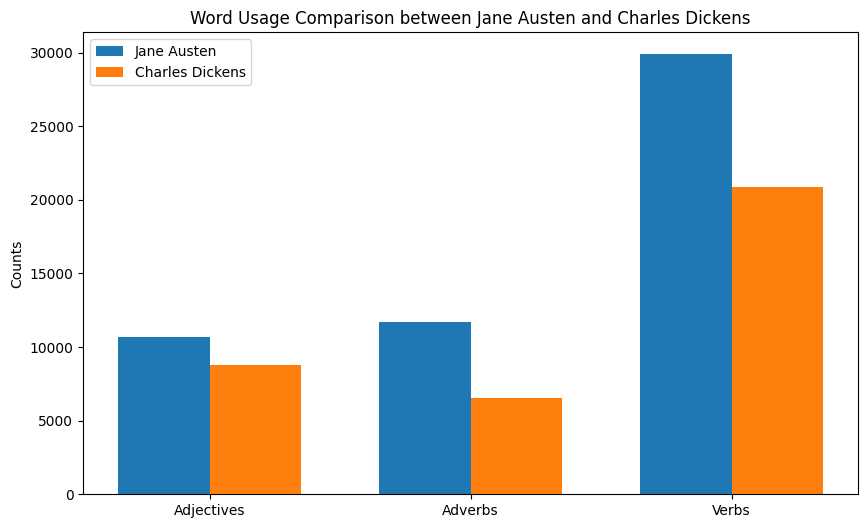

In [5]:
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

# Define a function to label adjectives, adverbs and verbs
def tag_words(text):
    words = word_tokenize(text)  # tokenize
    tagged_words = pos_tag(words)  # POS tagging

    # Filter adjectives, adverbs and verbs
    adjectives = [word for word, tag in tagged_words if tag in ('JJ', 'JJR', 'JJS')]
    adverbs = [word for word, tag in tagged_words if tag in ('RB', 'RBR', 'RBS')]
    verbs = [word for word, tag in tagged_words if tag.startswith('VB')]
    return adjectives, adverbs, verbs

# Initialize the dictionary used to store text for two authors
authors_texts = {
    'Jane Austen': '',
    'Charles Dickens': ''
}

file_name_austen = '/content/drive/My Drive/austen.txt'
file_name_dickens = '/content/drive/My Drive/dickens.txt'

with open(file_name_austen, 'r', encoding='utf-8') as file:
    authors_texts['Jane Austen'] = file.read()

with open(file_name_dickens, 'r', encoding='utf-8') as file:
    authors_texts['Charles Dickens'] = file.read()

# Initialize a dictionary to store adjective, adverb, and verb counts for two authors
adjectives_count = {'Jane Austen': Counter(), 'Charles Dickens': Counter()}
adverbs_count = {'Jane Austen': Counter(), 'Charles Dickens': Counter()}
verbs_count = {'Jane Austen': Counter(), 'Charles Dickens': Counter()}

# Tagging adjectives, adverbs and verbs in two authors' text
for author, text in authors_texts.items():
    adjectives, adverbs, verbs = tag_words(text)
    adjectives_count[author].update(adjectives)
    adverbs_count[author].update(adverbs)
    verbs_count[author].update(verbs)

# Print counts for two authors
for author in authors_texts:
    print(f"Author: {author}")
    print("Adjectives Count:", sum(adjectives_count[author].values()))
    print("Adverbs Count:", sum(adverbs_count[author].values()))
    print("Verbs Count:", sum(verbs_count[author].values()))
    print("\n")

# Calculate the total words for two authors
authors_counts = {
    author: [
        sum(adjectives_count[author].values()),
        sum(adverbs_count[author].values()),
        sum(verbs_count[author].values())
    ]
    for author in authors_texts
}

# create data for histogram
labels = ['Adjectives', 'Adverbs', 'Verbs']
authors = list(authors_texts.keys())
counts_austen = authors_counts['Jane Austen']
counts_dickens = authors_counts['Charles Dickens']

x = np.arange(len(labels))
width = 0.35

# create histogram
plt.figure(figsize=(10, 6))
rects1 = plt.bar(x - width/2, counts_austen, width, label='Jane Austen')
rects2 = plt.bar(x + width/2, counts_dickens, width, label='Charles Dickens')

# Add text labels, titles, and custom X-axis ticks
plt.ylabel('Counts')
plt.title('Word Usage Comparison between Jane Austen and Charles Dickens')
plt.xticks(x, labels)
plt.legend()

plt.show()

# 2.4 Part-of-Speech(Tagging) - Wordcloud
#### In our coursework 1, we summarise all words in 2 word cloud, which is slightly ambiguos, so we try to visualise words by the POS. An interesting thing in the adjective word cloud of Jane Austen, "ill" is a high-frequency word, so we can speculate that many characters are in an "ill" situation in her works. In the adverb word cloud, "yet" appears in both their word cloud, consider The use of "yet" usually depends on the tense and context of the sentence, and it can play different roles in the sentence, thereby changing the overall meaning of the sentence. Surprisingly, the word "love" highly appears in Charles Dickens's text, but not in Jane Austen's word cloud, perhaps it is because "Jane Austen usually writes more in a humorous way"?

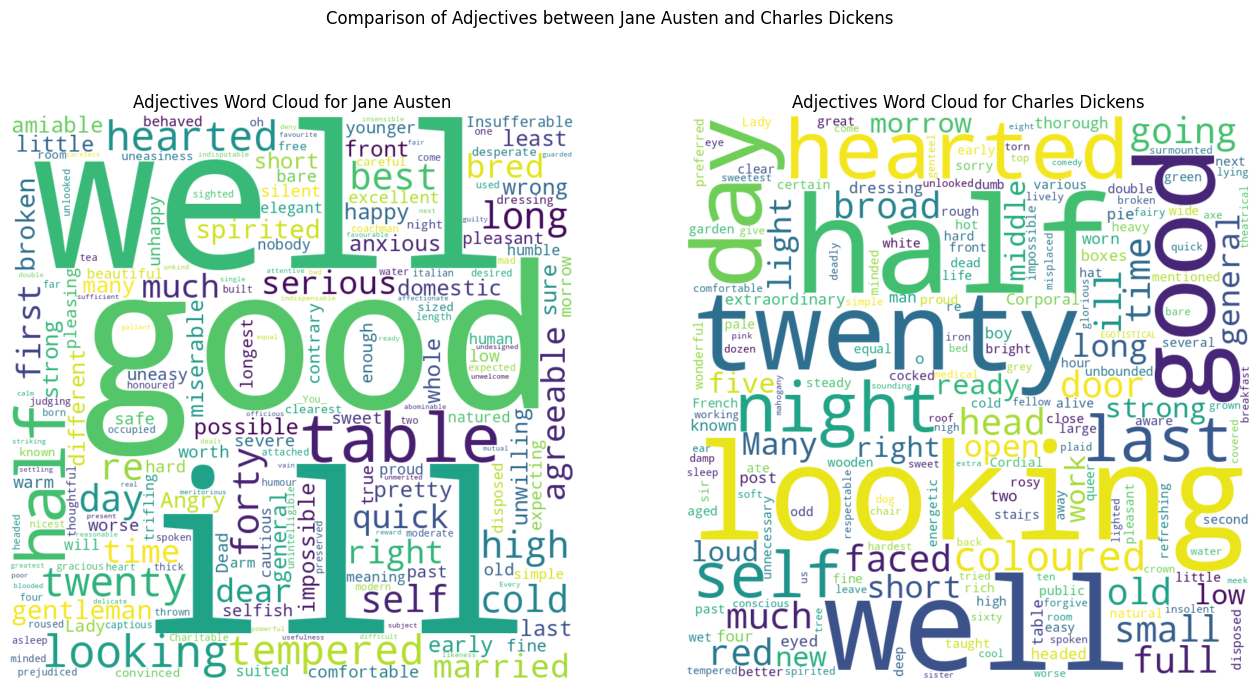

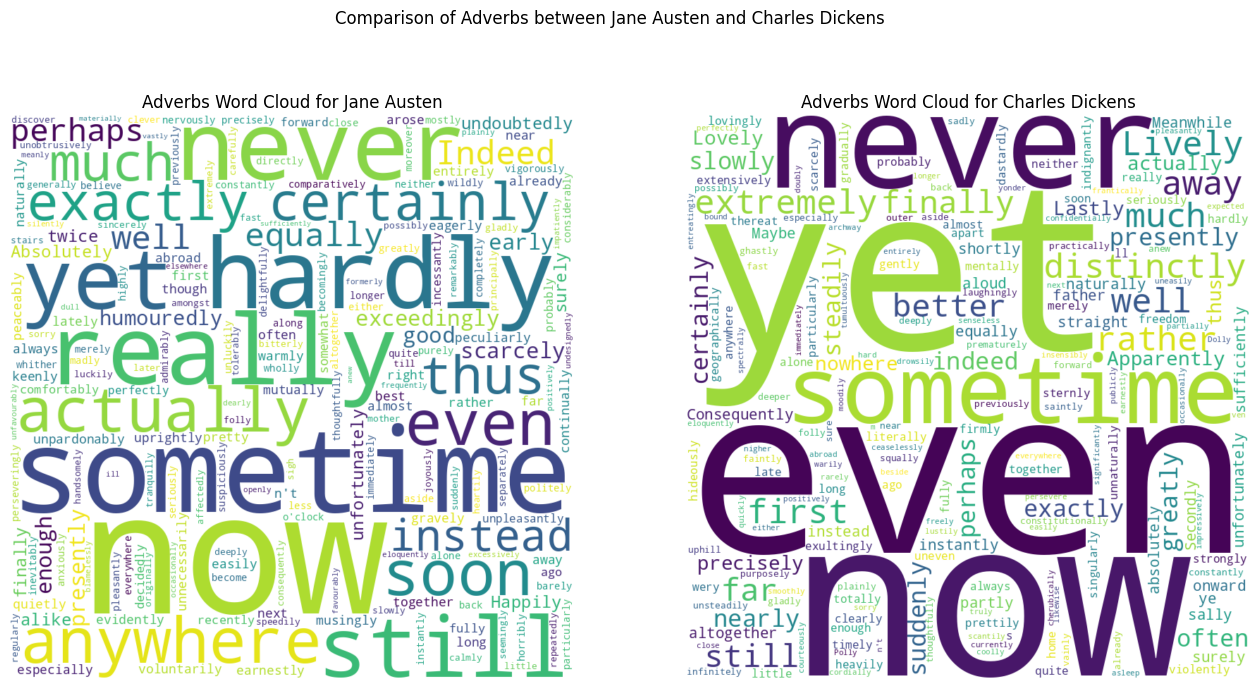

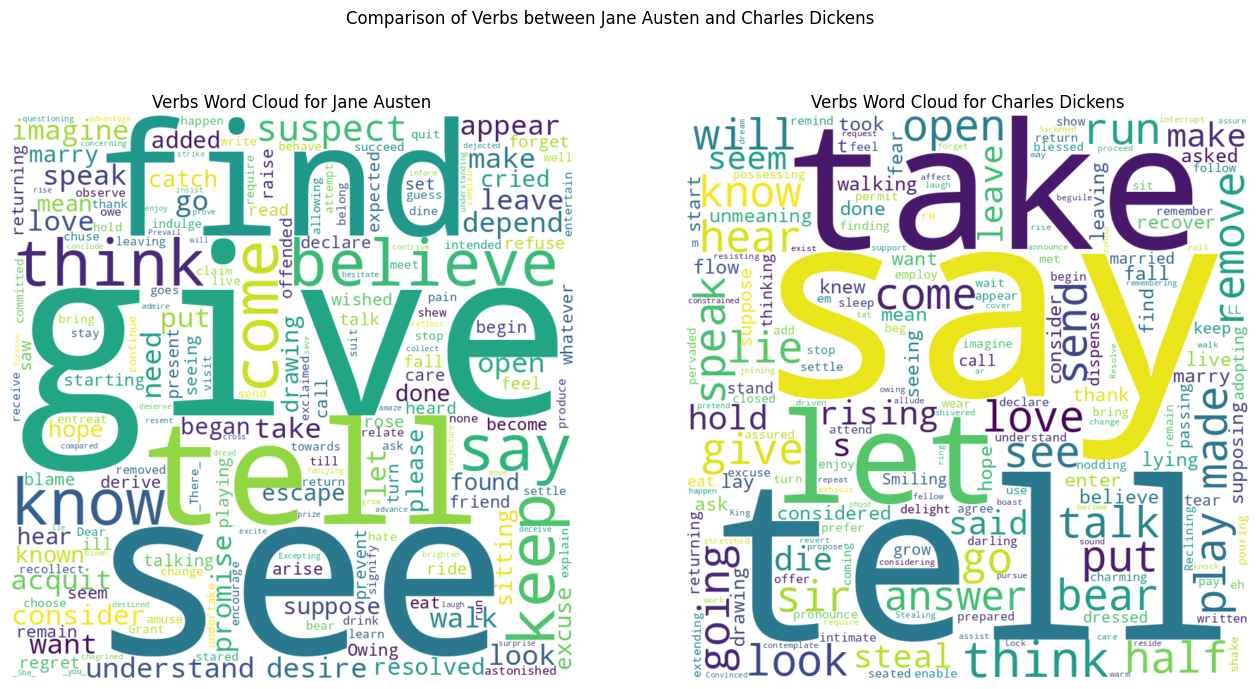

In [6]:
# # Tagging adjectives, adverbs and verbs in two authors' text
# for author, text in authors_texts.items():
#     adjectives, adverbs, verbs = tag_words(text)
#     adjectives_count[author].update(adjectives)
#     adverbs_count[author].update(adverbs)
#     verbs_count[author].update(verbs)

# Create separate word clouds for adjectives, adverbs, and verbs
word_types = ['Adjectives', 'Adverbs', 'Verbs']
word_counts = [adjectives_count, adverbs_count, verbs_count]

for i, word_type in enumerate(word_types):
    plt.figure(figsize=(16, 8))

    for j, author in enumerate(authors_texts):
        # Combine specific types of vocabulary
        words = ' '.join(word_counts[i][author].keys())
        wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(words)

        # disply wordcloud
        plt.subplot(1, 2, j+1)  # create subgraph
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f"{word_type} Word Cloud for {author}")

    plt.suptitle(f'Comparison of {word_type} between Jane Austen and Charles Dickens')
    plt.show()

# 2.5 Sentiment Analysis - by Authors
#### The main point here is to check the compound sentiment score for sentences. The result shows that the score of Jane Austen's text is much higher than Charles Dickens', which may indicate the differences in their writing style.

#### Positive Sentiment:
Austen's works show higher positive sentiment values (approximately 1000+).  
Dickens has lower positive sentiment (approximately 600-700).  
This reflects the generally more optimistic and positive tone in Austen's works.  


#### Negative Sentiment:
Dickens shows significantly higher negative sentiment values than Austen.  
This aligns with Dickens' frequent portrayal of social darkness, poverty, and other challenging themes.  


#### Neutral Expression:
Both writers maintain a considerable proportion of neutral expression.  
Dickens shows slightly higher neutral expression than Austen.  
This indicates that both value objective narration.  


#### Compound Sentiment:
Austen demonstrates higher compound sentiment values.  
This reflects her skill in portraying complex emotional states and character relationships.  

In [11]:
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to analyze sentiment
def analyze_sentiment_vader(text):
    return analyzer.polarity_scores(text)

# Initialize the dictionary to store sentiment analysis results
sentiments = {
    'Jane Austen': {'Positive': 0, 'Negative': 0, 'Neutral': 0, 'Compound': 0},
    'Charles Dickens': {'Positive': 0, 'Negative': 0, 'Neutral': 0, 'Compound': 0}
}

# Initialize an empty DataFrame to store sentiment analysis results
columns = ['Author', 'Sentence', 'Positive', 'Negative', 'Neutral', 'Compound']
sentiment_df = pd.DataFrame(columns=columns)

# Sentiment analysis two authors' text
for author, text in authors_texts.items():
    lines = text.split('\n')
    for line in lines:
        sentiment_scores = analyze_sentiment_vader(line)

        # Create a new DataFrame row
        new_row = pd.DataFrame({
            'Author': [author],
            'Sentence': [line],
            'Positive': [sentiment_scores['pos']],
            'Negative': [sentiment_scores['neg']],
            'Neutral': [sentiment_scores['neu']],
            'Compound': [sentiment_scores['compound']]
        })

        # Add new lines using pandas.concat
        sentiment_df = pd.concat([sentiment_df, new_row], ignore_index=True)

        # Update sentiment count
        if sentiment_scores['compound'] >= 0.05:
            sentiments[author]['Positive'] += 1
        elif sentiment_scores['compound'] <= -0.05:
            sentiments[author]['Negative'] += 1
        else:
            sentiments[author]['Neutral'] += 1
        sentiments[author]['Compound'] += sentiment_scores['compound']

# Print overall sentiment analysis results
for author, sentiment_counts in sentiments.items():
    print(f"Author: {author}")
    for sentiment, count in sentiment_counts.items():
        print(f"{sentiment}: {count}")
    print("\n")

# Disply DataFrame
print(sentiment_df.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Author: Jane Austen
Positive: 1263
Negative: 484
Neutral: 254
Compound: 643.4704999999994


Author: Charles Dickens
Positive: 976
Negative: 584
Neutral: 441
Compound: 311.7042000000008


        Author                                           Sentence  Positive  \
0  Jane Austen  Every qualification is raised at times, by the...     0.125   
1  Jane Austen  Her first attempts at usefulness were in an en...     0.115   
2  Jane Austen  Henry Crawford, ruined by early independence a...     0.134   
3  Jane Austen  "Oh dear!" cried Margaret, "how happy I should...     0.239   
4  Jane Austen  "Of course, it is not much consolation, when t...     0.067   

   Negative  Neutral  Compound  
0     0.053    0.822    0.4522  
1     0.093    0.792    0.2960  
2     0.087    0.780    0.9042  
3     0.136    0.626    0.4545  
4     0.100    0.833   -0.1531  


# 2.6 Sentiment Analysis - by Authors, Radar Chart
#### Overall Interpretation:
In general, Jane Austen’s works tend to be more positive and exhibit stronger overall emotional intensity, possibly including more pleasant, enthusiastic, or upbeat emotional elements. Dickens’s works, on the other hand, appear more restrained and evenly distributed emotionally, without the clearly elevated positive and overall sentiment observed in Austen’s texts. This suggests that Dickens’s writing may be relatively more balanced and moderate in emotional intensity.


#### Jane Austen (Blue):
The blue area represents the emotional characteristics of Jane Austen’s works. From the chart, we can see:  

There is a notable extension in the “Positive” direction, indicating that Austen’s texts exhibit stronger or more frequent positive emotions.  
The “Compound” (overall sentiment) segment is also more pronounced, suggesting that her texts generally lean more positively or display richer emotional content.  
The values along the “Neutral” and “Negative” axes are relatively lower than those on the positive and compound axes, but there is still some distribution present.  

#### Charles Dickens (Orange):
The orange area represents the emotional characteristics of Charles Dickens’s works. From the chart, we can see:  

The overall spread is smaller than Austen’s, indicating that the emotional distribution in Dickens’s texts is more balanced or of lower intensity across various dimensions.  
The extensions on the “Positive” and “Compound” axes are smaller compared to Austen, showing that Dickens’s texts exhibit less pronounced positive emotion and lower overall sentiment scores.  
Compared to Austen, there is not much difference along the “Neutral” axis. Meanwhile, the “Negative” axis does not show significantly higher negative emotions for Dickens—if anything, it appears comparable to or even lower than Austen’s.  


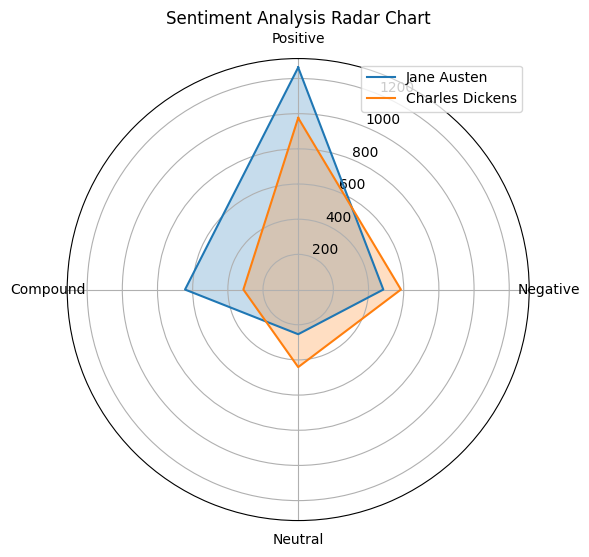

In [12]:
# Create radar chart angles and labels
labels = np.array(['Positive', 'Negative', 'Neutral', 'Compound'])
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # closure radar chart

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Loop through plotting sentiment data for two authors
for author, values in sentiments.items():
    stats = [values[label] for label in labels]
    stats += stats[:1]  # closure data
    ax.plot(angles, stats, label=author)
    ax.fill(angles, stats, alpha=0.25)

# Set radar chart parameters
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)  # make sure labels and angle numbers match

plt.title("Sentiment Analysis Radar Chart")
plt.legend(loc='upper right')
plt.show()

# 2.7 Sentiment Analysis - by Authors, Polirity and Subjective
#### Both authors' works display a degree of positive emotion, meaning they may reflect optimistic themes in their work eventually. Regarding subjectivity, the scores of both authors' works display a mixture of objective and subjective parts.

#### Overall:
Austen’s text is somewhat more positive and subjective.  
Dickens’s text is relatively more neutral and objective.  
In other words, Austen’s works are more likely to convey the characters’ or author’s emotional coloring, while Dickens’s narrative tends to be more neutrally and objectively presented.  

#### Jane Austen
Polarity = 0.1385: This polarity value, roughly between 0 and 1, falls on the mildly positive side. It suggests that Austen’s text has a slightly positive emotional tendency, not strongly upbeat, but still leaning toward a more positive emotional tone overall.  
Subjectivity = 0.5289: With subjectivity close to 0.53 (on a scale from 0 to 1), Austen’s work shows a moderate-to-high level of personal viewpoint, emotional judgment, or subjective influence. Her writing is not purely objective description.  

#### Charles Dickens
Polarity = 0.1031: Although this is also a positive value, it is lower than Austen’s. Dickens’s text leans slightly toward the positive side, but with a weaker positive feel. It’s more neutral and less distinctly upbeat compared to Austen’s.  
Subjectivity = 0.4931: With subjectivity around 0.49, which is slightly lower than Austen’s, Dickens’s text is relatively more objective. It shows fewer direct emotional judgments or subjective impressions.  

In [13]:
# Use the existing text data
corpus_df = pd.DataFrame.from_dict(authors_texts, orient='index').reset_index()
corpus_df.columns = ['Author', 'Text']

# Define sentiment analysis function
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment

# Sentiment analysis on each text
corpus_df['Sentiment'] = corpus_df['Text'].apply(analyze_sentiment)

# Display sentiment analysis results
for index, row in corpus_df.iterrows():
    print(f"Author: {row['Author']}")
    print(f"Sentiment: Polarity={row['Sentiment'].polarity}, Subjectivity={row['Sentiment'].subjectivity}\n")

Author: Jane Austen
Sentiment: Polarity=0.1384848284616694, Subjectivity=0.5289339826818287

Author: Charles Dickens
Sentiment: Polarity=0.10309247082706849, Subjectivity=0.49314400251931906



# 2.8 Preprocess Stop Word for TF-IDF and NER.
#### Even though it is not usually adapted in NLP, we choose to stemmer all words in the text and then remove them all for a consistency purpose because for our first attmept for TF-IDF. We print out the results for simply examine the stopwords.

In [14]:
nltk.download('stopwords')
nltk.download('punkt')  # dataset for tokenize

def process_text_file(file_path, author):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()

        # Remove stop words and tokenize
        text = text.replace("\n", " ")
        text = re.sub(r'[^\w\s\']', '', text)
        words = word_tokenize(text)

        # Initialize the stemmer
        stemmer = PorterStemmer()

        # Get stop words
        stopwords_list = stopwords.words('english')

        # Extract stem stop words from text
        stopwords_in_text = [stemmer.stem(word.lower()) for word in words if word.lower() in stopwords_list][:100]

        # Remove stop words from the text and stem the remaining words
        filtered_words = [stemmer.stem(word) for word in words if word.lower() not in stopwords_list]

        return {
            'Author': author,
            'Text': ' '.join(filtered_words),
            'Words': filtered_words,
            'RemovedStopwords': stopwords_in_text
        }

# File path
file_name_austen = '/content/drive/My Drive/austen.txt'
file_name_dickens = '/content/drive/My Drive/dickens.txt'

# Process two authors' text and collect data
authors = ['Jane Austen', 'Charles Dickens']
data_list = []

for file_name, author in zip([file_name_austen, file_name_dickens], authors):
    data = process_text_file(file_name, author)
    data_list.append(data)

# Create DataFrame
corpus_df = pd.DataFrame(data_list)

# Print DataFrame
print(corpus_df)

# Print the first 100 stop words removed for each author
for author_data in data_list:
    print(f"{author_data['Author']}'s Top 100 Removed Stopwords:")
    print(author_data['RemovedStopwords'])
    print("\n")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


            Author                                               Text  \
0      Jane Austen  everi qualif rais time circumst moment real va...   
1  Charles Dickens  take posit would distinctli understood seek al...   

                                               Words  \
0  [everi, qualif, rais, time, circumst, moment, ...   
1  [take, posit, would, distinctli, understood, s...   

                                    RemovedStopwords  
0  [is, at, by, the, of, the, to, more, than, it,...  
1  [and, in, up, thi, we, have, it, that, we, do,...  
Jane Austen's Top 100 Removed Stopwords:
['is', 'at', 'by', 'the', 'of', 'the', 'to', 'more', 'than', 'it', 'and', 'she', 'wa', 'down', 'by', 'to', 'as', 'more', 'to', 'than', 'her', 'at', 'were', 'in', 'an', 'to', 'out', 'who', 'were', 'the', 'but', 'not', 'she', 'wa', 'to', 'in', 'her', 'but', 'on', 'thi', 'were', 'wa', 'to', 'what', 'she', 'she', 'that', 'in', 'the', 'same', 'should', 'not', 'have', 'the', 'had', 'no', 'she', 'had', 'been'

# 2.9 Term Frequency - Inverse Document Frequency (TF-IDF)
#### We choose to stemmer all words in the text and then remove them all for a consistency purpose because for our first attempt for TF-IDF. The concept of TF-IDF is that we calculate the Term Frequency in the dataset, and then we calculate the Inverse Document Frequency of each word in the dataset. The ratio of them represents the importance of a word in the dataset. For each dataset, a vector is constructed containing the TF-IDF scores for all words so that each dataset is converted into a vector, which their dimensions are equal to the total number of words in the datasets.

In [15]:
# Initialize the TF-IDF vectorizer and adjust the min_df and max_df parameters
# min_df = 1 means the word appears in at least 1 dataset
# max_df = 0.95 means the word appears in at most 95% of the datasets
vectorizer = TfidfVectorizer(min_df=1, max_df=0.95)

# Extract processed text
texts = corpus_df['Text'].tolist()

# Fit and transform text using the TF-IDF vectorizer
tfidf_matrix = vectorizer.fit_transform(texts)

# Get feature name (word)
feature_names = vectorizer.get_feature_names_out()

# Convert TF-IDF matrix to DataFrame
# Each row represents a text, each column represents a word in the vocabulary,
#  and each element is the TF-IDF score of the corresponding word in the text.
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names, index=corpus_df['Author'])

# Check TF-IDF DataFrame
print(df_tfidf)

# Print out feature names (words)
print(vectorizer.get_feature_names_out())

                      103      10th       113        12     12_s_      12th  \
Author                                                                        
Jane Austen      0.000000  0.000000  0.000000  0.000000  0.002624  0.002624   
Charles Dickens  0.004322  0.004322  0.004322  0.004322  0.000000  0.000000   

                    13_s_       144     14_s_      14th  ...      youv  \
Author                                                   ...             
Jane Austen      0.000000  0.002624  0.000000  0.005247  ...  0.000000   
Charles Dickens  0.004322  0.000000  0.004322  0.000000  ...  0.021611   

                 youwheth    youyou        yr   zealous    zenith    zephyr  \
Author                                                                        
Jane Austen      0.000000  0.002624  0.002624  0.002624  0.000000  0.000000   
Charles Dickens  0.004322  0.000000  0.000000  0.000000  0.004322  0.004322   

                     zest    zither     zound  
Author               

# 2.10 Named Entity Recognition (NER)
#### At first, we tried to proceed with NER for listing all the characters' names to store in a dataframe and calculated all the characters' sentiment scores so that we could display all characters' sentiment colors in a 3D sphere. However, it means we had to calculate 6,119 times(names) in separate nearly 12,000 lines two datasets, and it is way out of our computing power (sadly, the program ran for 3 hours without output). Therefore, we choose to examine certain famous characters' sentiment scores, providing a different approach for executing sentiment analysis in literature works in our DSM020 coursework.

In [16]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')

def extract_person_names(text):
    # tokenize
    words = word_tokenize(text)
    # POS taging
    pos_tags = pos_tag(words)
    # Named entity recognition by using ne_chunk
    named_entities = ne_chunk(pos_tags)

    # Extract person name entity
    person_names = []
    for entity in named_entities:
        if isinstance(entity, Tree) and entity.label() == 'PERSON':
            name = " ".join([leaf[0] for leaf in entity.leaves()])
            person_names.append(name)
    return person_names

# Use the text in the authors_texts dictionary for name entity extraction
for author, text in authors_texts.items():
    person_names = extract_person_names(text)
    print(f"Author: {author}")
    print("Characters Names:")
    print(person_names)
    print("Total Number of Character Names:", len(person_names))
    print("\n")

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Author: Jane Austen
Characters Names:
['Harriet', 'Emma', 'Harriet', 'Goddard', 'Henry Crawford', 'Fanny Price', 'Fanny', 'Margaret', 'Georgiana', 'Catherine', 'Frederick', 'Henry', 'Isabella', 'Miss Morton', 'Edward', 'Robert', 'Edward', 'Lucy', 'Ferrars', 'Edward', 'Lucy', 'Mr. Crawford', 'Miss Crawford', 'Harriet', 'Emma', 'Emma', 'Harriet', 'Mr. Elton', 'Harriet', 'Mrs Smith', 'Fanny', 'Miss Crawford', 'Edmund', 'Kitty', 'Harriet', 'Marianne', 'Mr. Knightley', 'Frank Churchill', 'Emma', 'Mr. Knightley', 'Jane Fairfax', '_She_', 'Jane', 'Harriet', 'Mr. Wickham', 'Colonel Wallis', 'Elliot', 'Elizabeth', 'Miss Carteret', 'Anne', 'Miss Larolles', 'Fitzwilliam', 'Bingley', 'Miss Darcy', 'Tom Bertram', 'William', 'Streph', 'Alas', 'Marianne', 'Has Miss Bennett', 'Certainly', 'Lady Middleton', 'Harry', 'Harriet', 'Benjamin Portal', 'Fanny', 'Fanny', 'Edmund', 'William Price', 'Edmund', 'Mansfield', 'Miss Crawford', 'Elizabeth', 'Mr. Bertram', 'Miss Crawford', 'Edmund', 'Mr. Rushworth', 'M

# 2.11 Sentiment Analysis - by Characters(example)
### We pick famous characters "Elizabeth" and "Darcy" in Jane Austen's work, and pick "Oliver", "Oliver Twist", "Bill", and "Bill Sikes" in Charles Dickens's work. The interesting thing here is that there are significant differences in compound sentiment scores when mentioning "Oliver" and "Oliver Twist", we can assume that sentences with "Oliver" are more positive yet "Oliver Twist" is with way more negative sentiment.

### Summary:
his analysis reveals differences in sentiment between characters from Jane Austen and Charles Dickens:
Austen’s characters are depicted in a more positive light, consistent with her writing style and themes.
Dickens’ characters, especially villains like Bill Sikes, are portrayed with heavier negative tones, aligning with his critical narrative and social commentary.
This highlights the distinct storytelling styles and emotional tones employed by the two authors.

### Character Sentiment Analysis:

#### Characters from Jane Austen:
#### Elizabeth
Positive: 0.138, indicating that mentions of Elizabeth are mostly associated with positive sentiment.
Compound: 0.390, showing a strong overall positive tone, reflecting her as a beloved protagonist.

#### Darcy
Positive: 0.124, slightly lower than Elizabeth, but still leaning toward positive sentiment.
Compound: 0.340, indicating that mentions of Darcy are generally positive but more subdued or neutral compared to Elizabeth.

### Characters from Charles Dickens:

#### Oliver
Positive: 0.097, suggesting that mentions of Oliver carry some positivity but not strongly.
Compound: 0.039, showing an overall neutral tone, portraying Oliver's character as hopeful yet with a subtle undertone of melancholy.

#### Oliver Twist
Positive: 0.111, slightly higher than "Oliver," possibly due to references including more descriptive background information.
Compound: -0.040, indicating a distinctly negative tone, reflecting Dickens’ focus on the hardships and challenges faced by "Oliver Twist."
Comparison: The emotional difference between "Oliver" and "Oliver Twist" highlights a shift in sentiment from a personal perspective to one deeply tied to the story's broader social context.

#### Bill
Negative: 0.116, significantly higher than the Oliver series, with notable negative sentiment.
Compound: -0.209, suggesting that mentions of Bill are predominantly negative, reinforcing his role as a morally dubious character.

#### Bill Sikes
Negative: 0.102, slightly lower than "Bill.":
Compound: -0.700, showing the most negative sentiment among all characters. This strongly emphasizes Dickens’ portrayal of Bill Sikes as an outright villain.

### Observations:
Jane Austen’s Characters Show More Positive Sentiment:
Elizabeth and Darcy exhibit higher positive sentiment scores, reflecting Austen’s generally lighter and more optimistic tone.
This aligns with Austen’s use of wit and humor in her social commentary.

#### Comparison between "Oliver" and "Oliver Twist":
Mentions of "Oliver" are more neutral or slightly positive, likely reflecting casual or hopeful scenarios involving the character.
Mentions of "Oliver Twist" contain more negative sentiment, often tied to background descriptions and conflicts.
This suggests that using the full name, tied to the story's context, evokes stronger negative emotions, highlighting Dickens’ critique of societal issues.

#### Comparison between "Bill" and "Bill Sikes":
Both characters display distinctly higher negative sentiment compared to others.
Bill Sikes, in particular, has the most negative compound score (-0.700), underscoring Dickens’ stark depiction of villains in his works.

In [17]:
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function for sentiment analysis
def analyze_sentiment_vader(text):
    return analyzer.polarity_scores(text)

# Character list
characters = ["Elizabeth", "Darcy", "Oliver", "Oliver Twist", "Bill", "Bill Sikes"]

# Initialize an empty DataFrame to store sentiment analysis results
columns = ['Character', 'Positive', 'Negative', 'Neutral', 'Compound']
character_sentiments = {character: {'Positive': 0, 'Negative': 0, 'Neutral': 0, 'Compound': 0, 'Count': 0} for character in characters}

# Sentiment analysis of both authors’ text
for author, text in authors_texts.items():
    lines = text.split('\n')
    for line in lines:
        for character in characters:
            if character in line:
                sentiment_scores = analyze_sentiment_vader(line)
                # Accumulate each sentiment score
                character_sentiments[character]['Positive'] += sentiment_scores['pos']
                character_sentiments[character]['Negative'] += sentiment_scores['neg']
                character_sentiments[character]['Neutral'] += sentiment_scores['neu']
                character_sentiments[character]['Compound'] += sentiment_scores['compound']
                # Record the number of sentences to calculate the average score
                character_sentiments[character]['Count'] += 1

df_list = []

for character, scores in character_sentiments.items():
    if scores['Count'] > 0:  # Avoid dividing by zero, tricky part
        averages = {score: total/scores['Count'] for score, total in scores.items() if score != 'Count'}
        df_list.append(pd.DataFrame([averages], index=[character]))

# Merge all DataFrames
character_sentiment_averages = pd.concat(df_list)

# Print the average emotion score for each character
print(character_sentiment_averages)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


              Positive  Negative   Neutral  Compound
Elizabeth     0.137685  0.072784  0.789537  0.390276
Darcy         0.124496  0.071043  0.804461  0.340107
Oliver        0.096698  0.084093  0.819256  0.038714
Oliver Twist  0.110500  0.056750  0.832750 -0.039750
Bill          0.059250  0.116250  0.824750 -0.209000
Bill Sikes    0.000000  0.102000  0.898000 -0.699700


# 3. Conclusions
#### From coursework 1 to coursework 2, we have examined different techniques in sentiment analysis, and those results are fitted even though we use different approaches from CW 1 and CW 2. We have not read all of the works of Jane Austen and Charles Dickens, but we can still understand the sentiment orientation of these results, proving that sentiment analysis in NLP is worth to research.

In [18]:
!pip freeze

absl-py==1.4.0
aiohttp==3.9.1
aiosignal==1.3.1
alabaster==0.7.13
albumentations==1.3.1
altair==4.2.2
anyio==3.7.1
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array-record==0.5.0
arviz==0.15.1
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.0
attrs==23.1.0
audioread==3.0.1
autograd==1.6.2
Babel==2.14.0
backcall==0.2.0
beautifulsoup4==4.11.2
bidict==0.22.1
bigframes==0.16.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.3.2
bqplot==0.12.42
branca==0.7.0
build==1.0.3
CacheControl==0.13.1
cachetools==5.3.2
catalogue==2.0.10
certifi==2023.11.17
cffi==1.16.0
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.7
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpickle==2.2.1
cmake==3.27.9
cmdstanpy==1.2.0
colorcet==3.0.1
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.4
cons==0.4.6
contextlib2==21.6.0
contourpy==1.2.0
cryptography==41.0.7
cufflinks==0.17.3
cupy-cuda12x==12.2.0
cvxopt==1.3.2
cvxpy==1.3.2
cycler==0.12.1
c